# Introduction to Time Series Forecasting

A **time series** is a sequence of data points that occur in successive order over some period of time. 

A time series can be **yearly** (for example, an annual budget), **quarterly** (for example, expenses), **monthly** (for example, air traffic), **weekly** (for example, sales quantity), **daily** (for example, weather), **hourly** (for example, stock prices), **minutes** (for example, inbound calls in a call centre), or even **seconds** in length, depending on the frequency (ex: web traffic).

Forecasting is the next step in the process, and it involves predicting the series' future values. When you generate scientific forecasts based on historical time stamped data, you're doing **time series forecasting**. It entails developing models based on previous data and applying them to make observations and guide future strategic decisions. A key distinction in forecasting is that the future outcome is completely unknown at the time of the work and can only be anticipated by meticulous analysis and evidence-based priors.

Now forecasting a time series can be broadly divided into two types.

- **Univariate Time Series Forecasting** is when you utilise only the prior values of a time series to predict its future values.

**For example** Here we have to forecast close price, so we are taking only past close prices to forecast prices in upcoming days

| Close | 
| --- | 
| 67.405298 | 
| 68.459983 |
| 69.785998 | 
| 70.225955 | 
| 65.345345 | 
| 68.353453 | 
| 69.345347 | 

--------------------------------

- **Multi Variate Time Series Forecasting** is when you employ predictors other than the series (also known as exogenous variables) to forecast.

**For example** Here close price value is dependent on open, high and low price values so we can use all these as features to fit our multivariate model and forecast close price value. 

| Close | Open | High | Low |
| --- | --- | --- | --- |
| 67.405998 | 70.123879 | 70.234878 | 66.438729 |
| 68.673246 | 71.237498 | 71.349828 | 67.278949	|
| 69.378432 | 72.892348 | 73.238947 | 68.298137	|
| 70.482379 | 71.782687 | 71.172838 | 66.982374	|
| 65.238973 | 74.928749 | 75.823890 | 63.287343	|
| 68.289349 | 75.389724 | 76.982479 | 66.248789	|
| 69.732878 | 78.287389 | 79.983789 | 65.737999	|

<hr style="border:1px solid black"> </hr>

#  Introduction to ARIMA Models

ARIMA models are a type of statistical model that can be used to analyse and forecast time series data. It gives a simple yet powerful way for creating time series forecasts by explicitly catering to a set of common structures in time series data.

ARIMA is an acronym for **AutoRegressive Integrated Moving Average**. It's a more complex version of the AutoRegressive Moving Average, with the addition of integration.


An ARIMA model is characterized by 3 terms: p, d, q
where,

- **p** is the order of the AR term. The number of lag observations included in the model, also called the lag order.

- **q** is the size of the moving average window, also called the order of moving average.

- **d** is the number of differencing required to make the time series stationary.

**What does ARIMA(p, d, q) mean?** 

For example :

- ARIMA(1, 0, 3) signifies that you're combining a 1st order Auto-Regressive model and a 3rd order Moving Average model to describe some response variable (Y) in your model. It's a good idea to think about it this way: (AR, I, MA). In simple words, this gives your model the following appearance:

    Y = (Auto-Regressive Parameters) + (Moving Average Parameters)

    The 0 between the 1 and the 3 represents the 'I' part of the model (the Integrative component), which denotes a model that takes the difference between response variable data - this can be done with non-stationary data, but you don't appear to be dealing with that, so ignore it.


- ARIMA(2, 1, 2) signifies that you're combining a 2nd order AR model and also a 2nd order MA model to describe Y. d = 1st denotes that the model used 1 order differencing to make the data stationary.

Just like these examples we have to find perfect order of p, d and q to fit the best model.

**There are a number of ways to find values of p, q and d:**

- look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate)
- look at a partial autocorrelation graph of the data (will help if AutoRegressive (AR) model is appropriate)
- look at extended autocorrelation chart of the data (will help if a combination of AR and MA are needed)
- try Akaike's Information Criterion (AIC) on a set of models and investigate the models with the lowest AIC values
- try the Schwartz Bayesian Information Criterion (BIC) and investigate the models with the lowest BIC values
-------------------------------
Before working with non-stationary data, the Autoregressive Integrated Moving Average (ARIMA) Model converts it to stationary data. One of the most widely used models for predicting linear time series data is this one.

The ARIMA model has been widely utilized in banking and economics since it is recognized to be reliable, efficient, and capable of predicting short-term share market movements.


<hr style="border:1px solid black"> </hr>

**Problem Statement** : In this notebook, we are going to use the ARIMA, SARIMA and Auto ARIMA model to forecast the stock price of Tesla.
<hr style="border:1px solid black"> </hr>

## Import the necessary libraries

In [3]:
!pip install pmdarima

In [1]:

import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## Loading the dataset

We are using historical prices of 3 year (12/2018 - 12/2021) for Tesla stock.

In [2]:
tsla = yf.Ticker('TSLA')

In [3]:
tsla = yf.Ticker('TSLA')

# get historical data as hist
hist = tsla.history(period="3y")

# Save dataframe as CSV file
hist.to_csv('TSLA.csv')

In [4]:
stock_data = pd.read_csv('TSLA.csv')
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-14 00:00:00-05:00,36.284000,36.493999,34.993332,35.861332,434943000,0.0,0.0
1,2020-01-15 00:00:00-05:00,35.317333,35.855999,34.452667,34.566666,260532000,0.0,0.0
2,2020-01-16 00:00:00-05:00,32.916668,34.297333,32.811333,34.232666,326050500,0.0,0.0
3,2020-01-17 00:00:00-05:00,33.840668,34.377998,33.543999,34.033333,204436500,0.0,0.0
4,2020-01-21 00:00:00-05:00,35.349998,36.571999,35.227333,36.480000,267052500,0.0,0.0


In [5]:
# As we are performing UniVariate Time Series Analysis so we will conside only close price.

stock_data = stock_data[['Date','Close']] # filtering the dataframe to date and close price

In [6]:
stock_data

,Date,Close
0,2020-01-14 00:00:00-05:00,35.861332
1,2020-01-15 00:00:00-05:00,34.566666
2,2020-01-16 00:00:00-05:00,34.232666
3,2020-01-17 00:00:00-05:00,34.033333
4,2020-01-21 00:00:00-05:00,36.480000
...,...,...
752,2023-01-09 00:00:00-05:00,119.769997
753,2023-01-10 00:00:00-05:00,118.849998
754,2023-01-11 00:00:00-05:00,123.220001
755,2023-01-12 00:00:00-05:00,123.559998


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    757 non-null    object 
 1   Close   757 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [9]:
stock_data.Date = pd.to_datetime(stock_data.Date) # convert Date data type ('object') to datetime

In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    757 non-null    object 
 1   Close   757 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [11]:
stock_data

,Date,Close
0,2020-01-14 00:00:00-05:00,35.861332
1,2020-01-15 00:00:00-05:00,34.566666
2,2020-01-16 00:00:00-05:00,34.232666
3,2020-01-17 00:00:00-05:00,34.033333
4,2020-01-21 00:00:00-05:00,36.480000
...,...,...
752,2023-01-09 00:00:00-05:00,119.769997
753,2023-01-10 00:00:00-05:00,118.849998
754,2023-01-11 00:00:00-05:00,123.220001
755,2023-01-12 00:00:00-05:00,123.559998


In [12]:
stock_data = stock_data.set_index("Date") # setting date as index

In [13]:
stock_data.head(5) 

,Close
Date,
2020-01-14 00:00:00-05:00,35.861332
2020-01-15 00:00:00-05:00,34.566666
2020-01-16 00:00:00-05:00,34.232666
2020-01-17 00:00:00-05:00,34.033333
2020-01-21 00:00:00-05:00,36.480000


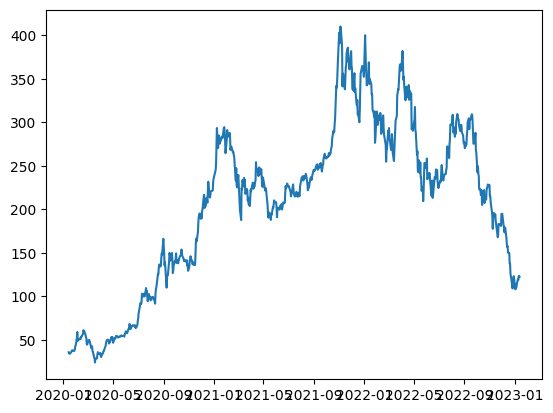

In [14]:
import matplotlib.pyplot as plt
plt.plot(stock_data['Close'])

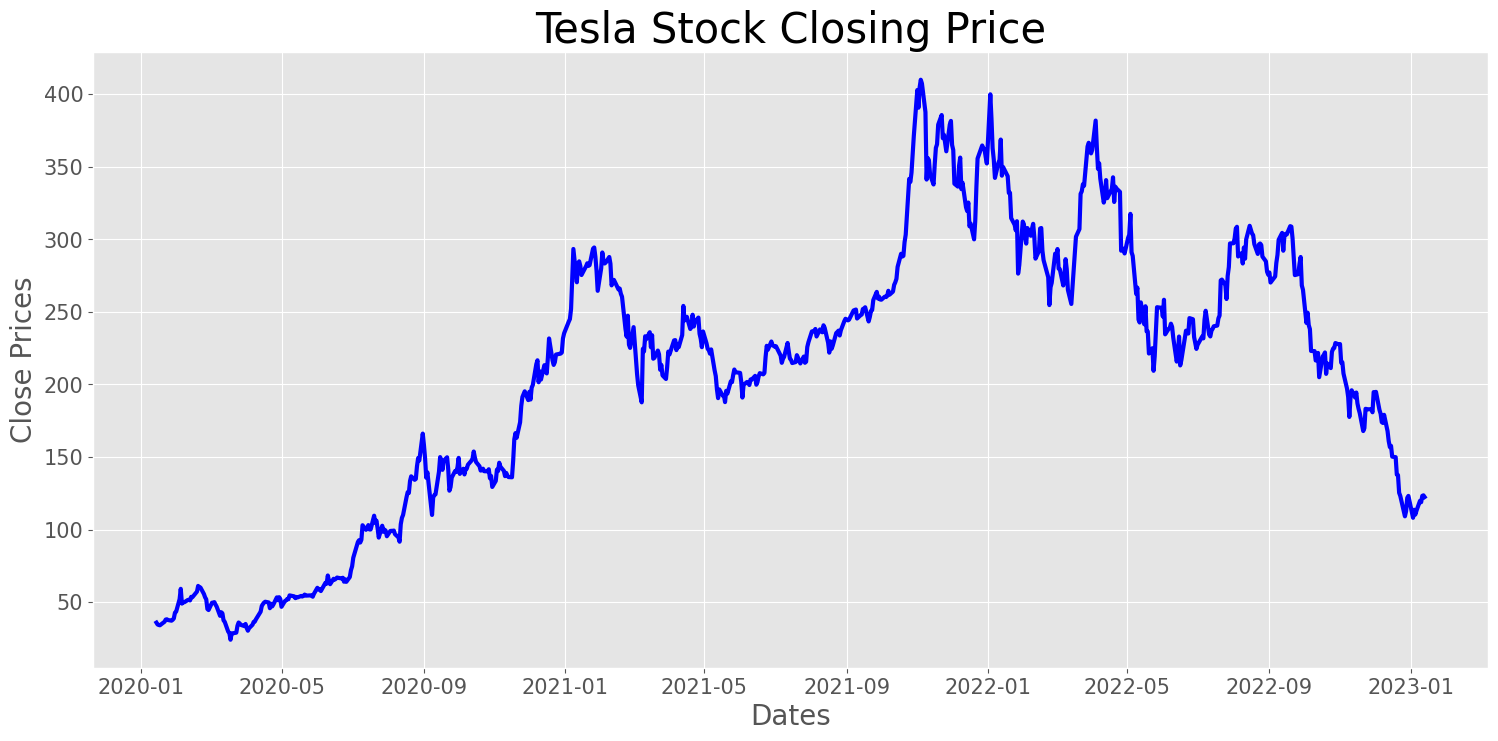

In [15]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

<AxesSubplot: xlabel='Close', ylabel='Density'>

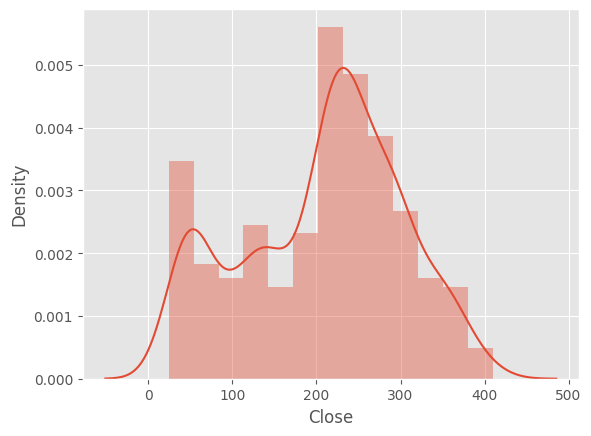

In [16]:
import seaborn as sns
sns.distplot(stock_data['Close'])

A probability distribution can also be used to illustrate the data in our series.

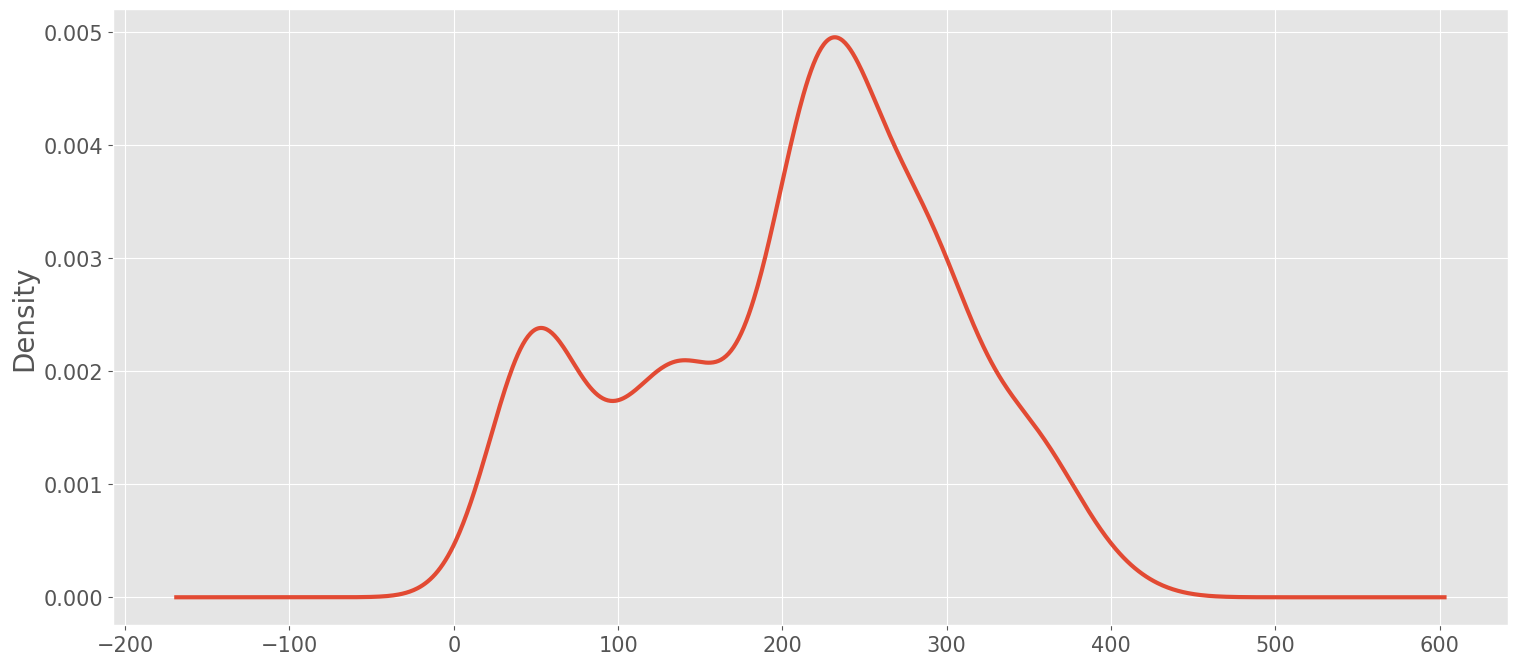

In [17]:
# Distribution of the close price  
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

<hr style="border:1px solid black"> </hr>
A time series is also thought to include three systematic components: level, trend, and seasonality, as well as one non-systematic component termed noise.

The components' definitions are as follows:
- The **level** is the sum of all the values in a series.
- The **trend** is the upward or downward movement of the series' value.
- The series' short-term cycle is known as **seasonality**.
- **Noise** is the term for the random variation in the series.
------------------------------------
## Check for stationarity

Time series analysis only works with stationary data, so we must first determine **whether a series is stationary.**
Stationary time series is when the mean and variance are constant over time. It is easier to predict when the series is stationary.

**What does it mean for data to be stationary?**

- The mean of the series should not be a function of time. Because the mean increases over time, the red graph below is not stationary.

<img src="https://imgur.com/LjtBXwf.png">
- The variance of the series should not be a function of time. Homoscedasticity is the term for this characteristic. The varying spread of data over time can be seen in the red graph.

<img src="https://imgur.com/v2Uye7X.png">

- Finally, neither the I th term nor the (I + m) th term's covariance should be a function of time. As you can see in the graph below, the spread gets less as time goes on. As a result, the'red series' covariance does not remain constant throughout time.

<img src="https://i.imgur.com/6HVlvg2.png">

<hr style="border:1px solid black"> </hr>

### ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most extensively used statistical tests. It can be used to establish whether a series has a unit root and, as a result, whether the series is stationary. The null and alternate hypotheses for this test are:
Distinguish between point to point links and multi point links
**Null Hypothesis**: The series has a unit root (a =1).

**Alternative Hypothesis**: There is no unit root in the series.

The series is considered to be non-stationary if the null hypothesis is not rejected. As a result, the series can be linear or difference stationary.
If both the mean and standard deviation are flat lines, the series becomes stationary (constant mean and constant variance).

In [18]:
stock_data

,Close
Date,
2020-01-14 00:00:00-05:00,35.861332
2020-01-15 00:00:00-05:00,34.566666
2020-01-16 00:00:00-05:00,34.232666
2020-01-17 00:00:00-05:00,34.033333
2020-01-21 00:00:00-05:00,36.480000
...,...
2023-01-09 00:00:00-05:00,119.769997
2023-01-10 00:00:00-05:00,118.849998
2023-01-11 00:00:00-05:00,123.220001


In [19]:
type(stock_data['Close'])

pandas.core.series.Series

In [20]:
np.mean(stock_data['Close'].head(12))

37.11616643269857

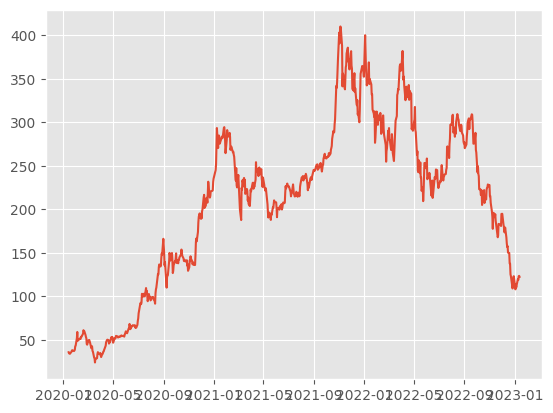

In [21]:
plt.plot(stock_data['Close'])

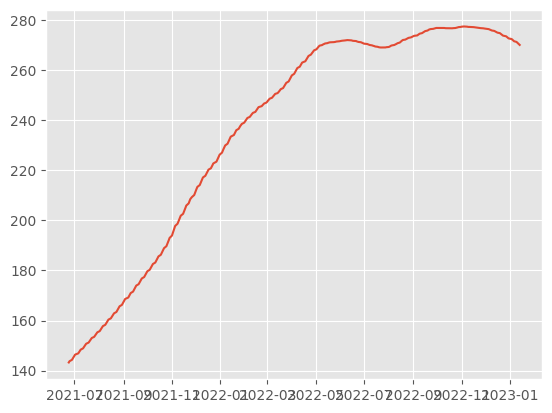

In [22]:
plt.plot(stock_data['Close'].rolling(365).mean())

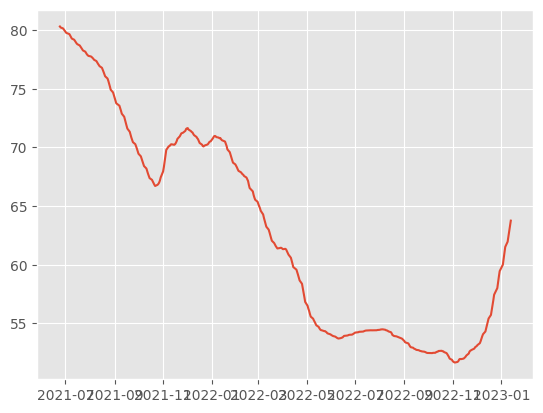

In [23]:
plt.plot(stock_data['Close'].rolling(365).std() )

In [24]:
adfuller(stock_data['Close'],autolag='AIC')

(-1.8952717422226428,
 0.3342886913750759,
 9,
 747,
 {'1%': -3.439134355513998,
  '5%': -2.865416893922985,
  '10%': -2.56883447171999},
 5337.673842267241)

In [25]:
rolmean = timeseries.rolling(12).mean() # rolling mean
rolstd = timeseries.rolling(12).std() # rolling standard deviation

NameError: name 'timeseries' is not defined

In [26]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    


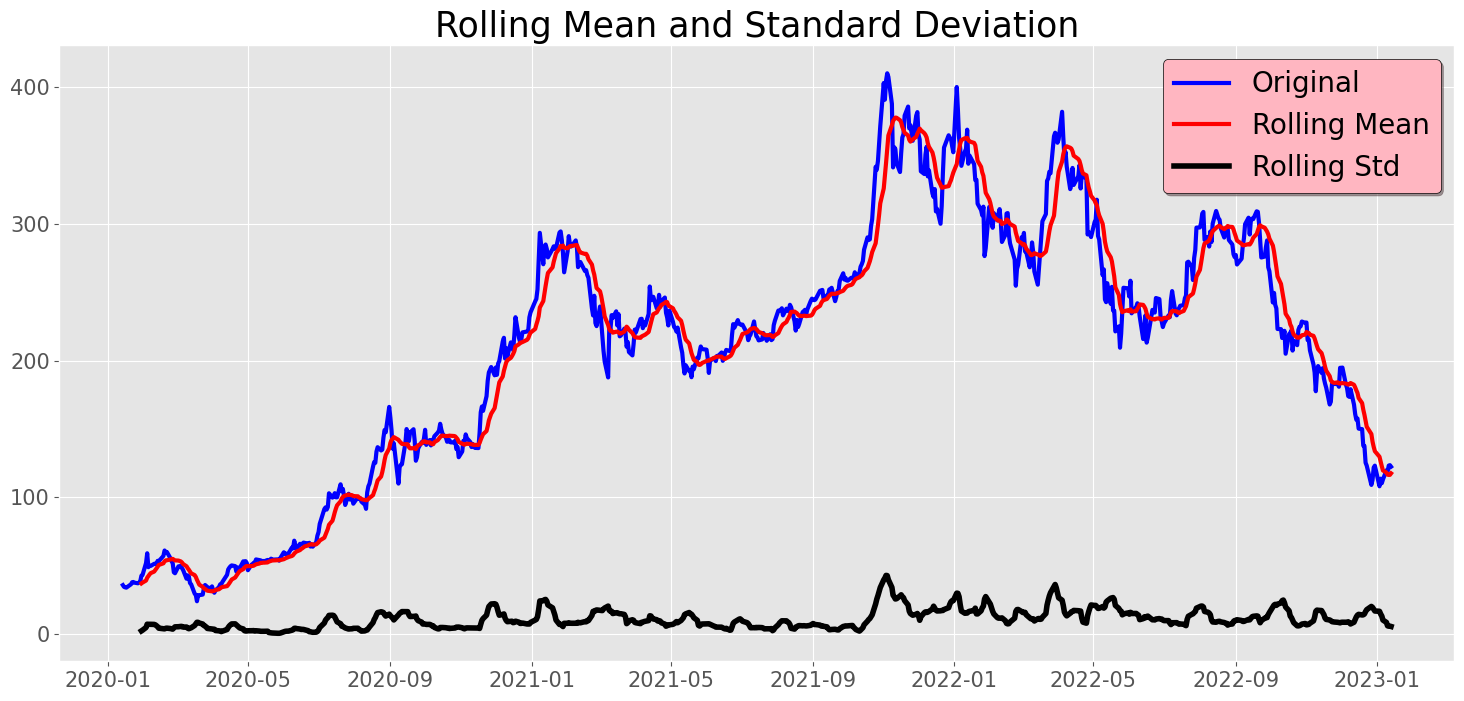

Results of dickey fuller test
Test Statistics                 -1.895272
p-value                          0.334289
No. of lags used                 9.000000
Number of observations used    747.000000
critical value (1%)             -3.439134
critical value (5%)             -2.865417
critical value (10%)            -2.568834
dtype: float64


In [27]:
test_stationarity(stock_data['Close'])

<hr style="border:1px solid black"> </hr>
We can't reject the Null hypothesis because the p-value is bigger than 0.05. Furthermore, the test statistics exceed the critical values. As a result, the data is not stationary.

Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in preparing data to be used in an ARIMA model.
So, to make the data stationary, we need to take the first-order difference of the data. Which is just another way of saying, subtract today’s close price from yesterday’s close price.


In [28]:
df_close=stock_data['Close']

In [29]:
df_close

Date
2020-01-14 00:00:00-05:00     35.861332
2020-01-15 00:00:00-05:00     34.566666
2020-01-16 00:00:00-05:00     34.232666
2020-01-17 00:00:00-05:00     34.033333
2020-01-21 00:00:00-05:00     36.480000
                                ...    
2023-01-09 00:00:00-05:00    119.769997
2023-01-10 00:00:00-05:00    118.849998
2023-01-11 00:00:00-05:00    123.220001
2023-01-12 00:00:00-05:00    123.559998
2023-01-13 00:00:00-05:00    122.400002
Name: Close, Length: 757, dtype: float64

In [30]:
38.125999-39.098000

-0.9720009999999988

In [31]:
38.546001-41.015999

-2.469998000000004

In [32]:
df_close.diff()

Date
2020-01-14 00:00:00-05:00         NaN
2020-01-15 00:00:00-05:00   -1.294666
2020-01-16 00:00:00-05:00   -0.334000
2020-01-17 00:00:00-05:00   -0.199333
2020-01-21 00:00:00-05:00    2.446667
                               ...   
2023-01-09 00:00:00-05:00    6.709999
2023-01-10 00:00:00-05:00   -0.919998
2023-01-11 00:00:00-05:00    4.370003
2023-01-12 00:00:00-05:00    0.339996
2023-01-13 00:00:00-05:00   -1.159996
Name: Close, Length: 757, dtype: float64

In [33]:
# Get the difference of each Adj Close point
tsla_close_diff_1 = df_close.diff()

In [34]:
tsla_close_diff_1

Date
2020-01-14 00:00:00-05:00         NaN
2020-01-15 00:00:00-05:00   -1.294666
2020-01-16 00:00:00-05:00   -0.334000
2020-01-17 00:00:00-05:00   -0.199333
2020-01-21 00:00:00-05:00    2.446667
                               ...   
2023-01-09 00:00:00-05:00    6.709999
2023-01-10 00:00:00-05:00   -0.919998
2023-01-11 00:00:00-05:00    4.370003
2023-01-12 00:00:00-05:00    0.339996
2023-01-13 00:00:00-05:00   -1.159996
Name: Close, Length: 757, dtype: float64

### do differencing until it converts into stationary data where mean and variance are constant


In [35]:

tsla_close_diff_1.dropna(inplace=True)

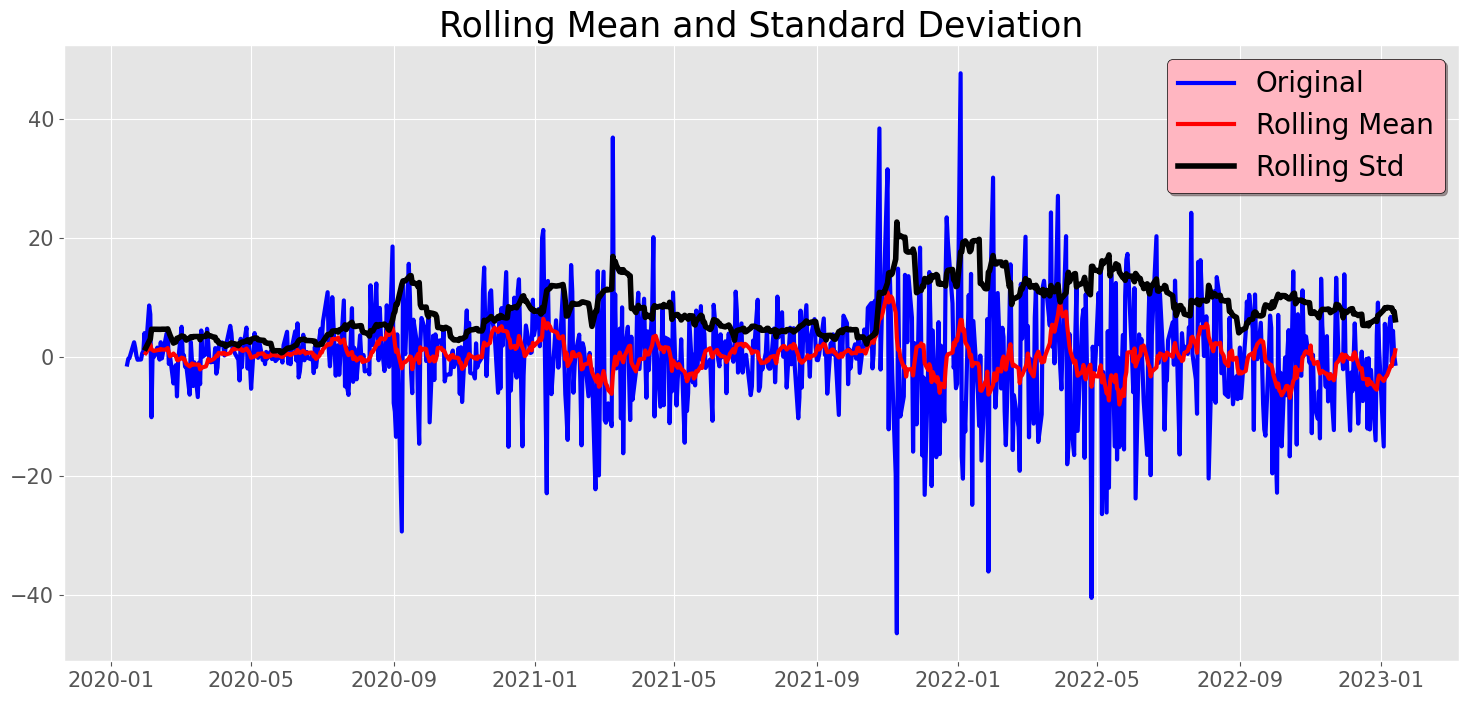

Results of dickey fuller test
Test Statistics               -8.159439e+00
p-value                        9.228590e-13
No. of lags used               8.000000e+00
Number of observations used    7.470000e+02
critical value (1%)           -3.439134e+00
critical value (5%)           -2.865417e+00
critical value (10%)          -2.568834e+00
dtype: float64


In [36]:
# Plot the tsla Adj Close 1st order difference
test_stationarity(tsla_close_diff_1)

In [37]:
we will try to check the treand in the data

breakdown

season cycle error as well




SyntaxError: invalid syntax (1008751775.py, line 1)

The p-value is obtained is less than significance level of 0.05 and the ADF statistic is lower than any of the critical values.

We can reject the null hypothesis. So, the time series is in fact stationary.

**Decompose the time series :**
To start with, we want to decompose the data to seperate the seasonality, trend and residual. Since we have 3 years of stock data. We would expect there's a yearly or weekly pattern. Let's use a function seasonal_decompose in statsmodels to help us find it.

In [38]:
stock_data[["Close"]]

,Close
Date,
2020-01-14 00:00:00-05:00,35.861332
2020-01-15 00:00:00-05:00,34.566666
2020-01-16 00:00:00-05:00,34.232666
2020-01-17 00:00:00-05:00,34.033333
2020-01-21 00:00:00-05:00,36.480000
...,...
2023-01-09 00:00:00-05:00,119.769997
2023-01-10 00:00:00-05:00,118.849998
2023-01-11 00:00:00-05:00,123.220001


In [39]:
result=seasonal_decompose(stock_data[["Close"]],freq=30)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [40]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

NameError: name 'result' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
result=seasonal_decompose(stock_data[["Close"]],model="multiplicative",freq=30)
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

Now we'll create an ARIMA model and train it using the train data's stock closing price. So, let’s visualize the data by dividing it into training and test sets.

In [50]:
a=[1,2,3,4,5,6,7,8,9,10]

In [51]:
type(a)

list

In [52]:
a[0:7]

[1, 2, 3, 4, 5, 6, 7]

In [53]:
a[0:-3]

[1, 2, 3, 4, 5, 6, 7]

In [54]:
a[-3:]

[8, 9, 10]

In [55]:
range(len(a))

range(0, 10)

In [56]:
train_data=df_close[0:-60]

In [57]:
test_data=df_close[-60:]

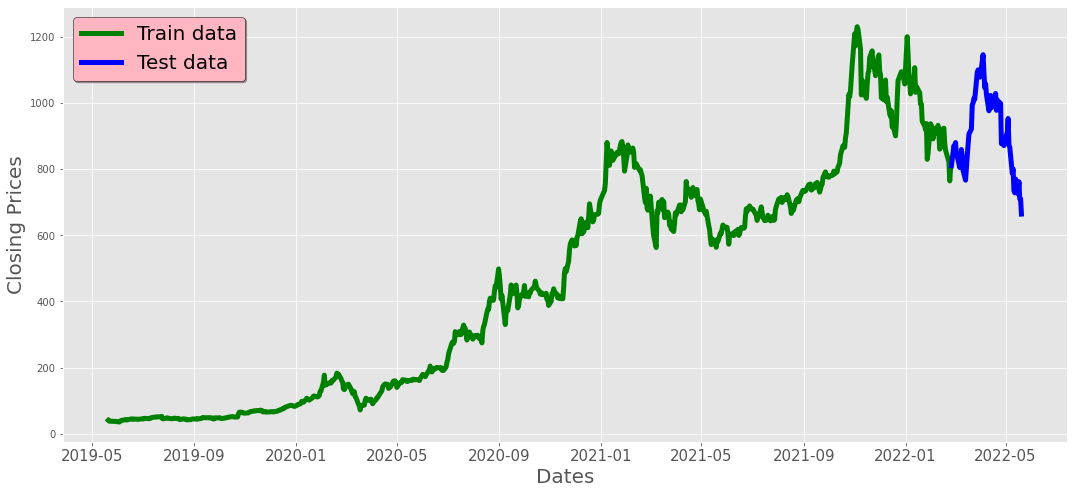

In [58]:
#split data into train and training set
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

## Auto-correlations

After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. 

By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

-------------------------------------
- **Autocorrelation function plot (ACF):**
Autocorrelation refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit. In ACF, the correlation coefficient is in the x-axis whereas the number of lags is shown in the y-axis.

Normally, we employ either the AR term or the MA term in an ARIMA model. Both of these phrases are rarely used on rare occasions. The ACF plot is used to determine which of these terms we should utilise for our time series.
 - If the autocorrelation at lag 1 is positive, we utilise the AR model.
 - If the autocorrelation at lag 1 is negative, we employ the MA model.

We move on to Partial Autocorrelation function plots (PACF) after plotting the ACF plot.

------------------------------
- **Partial Autocorrelation function plots (PACF)**
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

If the PACF plot drops off at lag n, then use an AR(n) model and if the drop in PACF is more gradual then we use the MA term.

Use AR terms in the model when the
- ACF plots show autocorrelation decaying towards zero
- PACF plot cuts off quickly towards zero
- ACF of a stationary series shows positive at lag-1

Use MA terms in the model when the model is
- Negatively Autocorrelated at Lag — 1
- ACF that drops sharply after a few lags
- PACF decreases more gradually

<hr style="border:1px solid black"> </hr>

In [41]:
var1=tsla_close_diff_1

In [42]:
var=tsla_close_diff_1[1:]

In [43]:
df=pd.DataFrame([var,var1])



In [44]:
df.T.corr

<bound method DataFrame.corr of                               Close     Close
Date                                         
2020-01-16 00:00:00-05:00 -0.334000 -0.334000
2020-01-17 00:00:00-05:00 -0.199333 -0.199333
2020-01-21 00:00:00-05:00  2.446667  2.446667
2020-01-22 00:00:00-05:00  1.490669  1.490669
2020-01-23 00:00:00-05:00  0.175999  0.175999
...                             ...       ...
2023-01-10 00:00:00-05:00 -0.919998 -0.919998
2023-01-11 00:00:00-05:00  4.370003  4.370003
2023-01-12 00:00:00-05:00  0.339996  0.339996
2023-01-13 00:00:00-05:00 -1.159996 -1.159996
2020-01-15 00:00:00-05:00       NaN -1.294666

[756 rows x 2 columns]>

In [45]:
np.cor(var1,var)

AttributeError: module 'numpy' has no attribute 'cor'

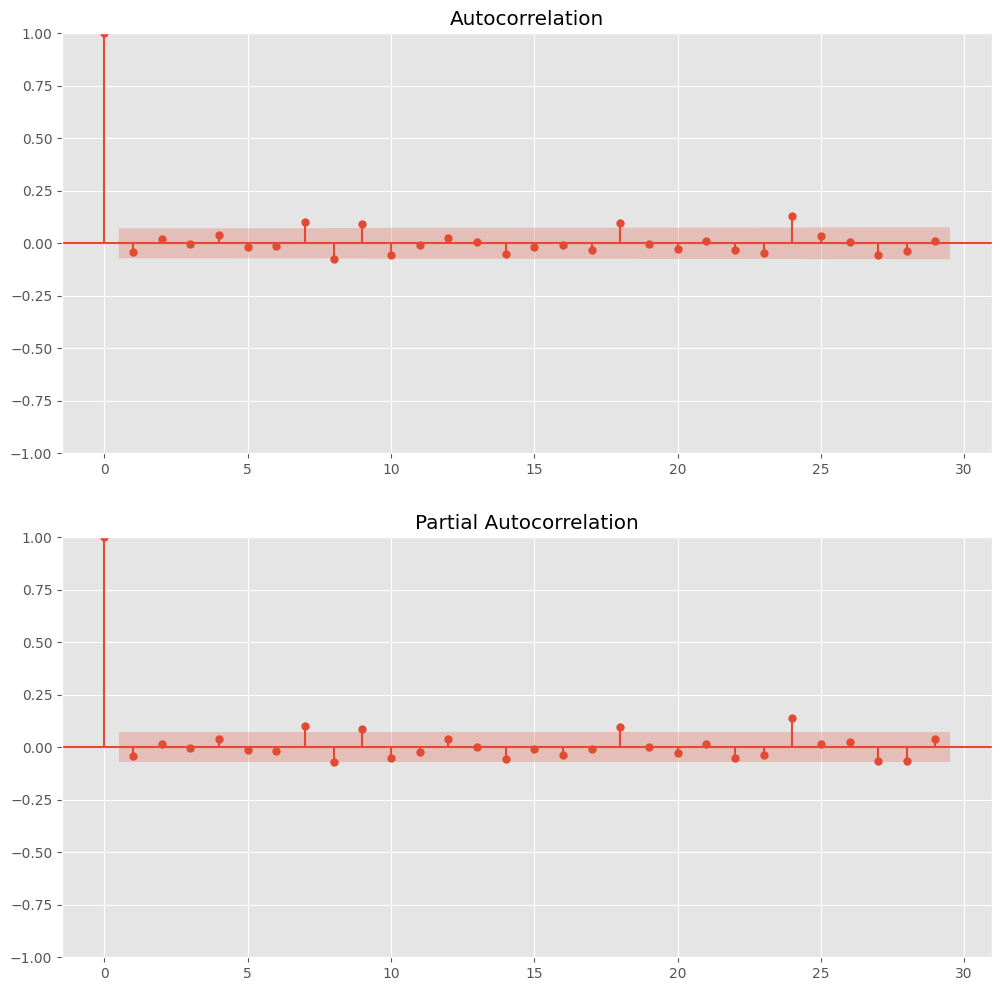

In [46]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(tsla_close_diff_1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(tsla_close_diff_1, ax=ax2)

- To estimate the amount of AR terms(**p**), you need to look at the PACF plot. First, ignore the value at lag 0. It will always show a perfect correlation, since we are estimating the correlation between today’s value with **itself**. Note that there is a coloured area in the plot, representing the confidence interval. To estimate how much AR terms you should use, start counting how many spikes are above or below the confidence interval before the next one enter the coloured area. So, looking at the PACF plot above, we can estimate to use 0 AR terms for our model, since no any spikes are out of the confidence interval.

---------------------------------------

- To calculate **d**, all you need to know how many differencing was used to make the series stationary. In our case, we have used order of 1st order differencing to make our data stationary.

---------------------------------------

- To estimate the amount of MA terms (**q**), this time you will look at ACF plot. The same logic is applied here: how many spikes are above or below the confidence interval before the next spike enters the coloured area? Here, we can estimate 0 MA terms, since no spike is out of the confidence interval.

So, we will use (0,1,0) order to fit ARIMA model.

We can also use different orders of p, d and q to get the best order with lowest AIC.

In [ ]:
6# evaluate an ARIMA model for a given order (p,d,q)

def evaluate_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [85]:
float("inf")

inf

In [47]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [48]:
p_values = range(0, 3)

In [49]:
list(p_values)

[0, 1, 2]

In [50]:
train_data

NameError: name 'train_data' is not defined

In [51]:
test_data

NameError: name 'test_data' is not defined

In [52]:
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

NameError: name 'train_data' is not defined

In [53]:
arima_order=(1,0,1)

In [54]:
history = [x for x in train_data]

NameError: name 'train_data' is not defined

In [55]:
history


import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
tsla = yf.Ticker('TSLA')
tsla = yf.Ticker('TSLA')

# get historical data as hist
hist = tsla.history(period="3y")

# Save dataframe as CSV file
hist.to_csv('TSLA.csv')
stock_data = pd.read_csv('TSLA.csv')
stock_data.head()
# As we are performing UniVariate Time Series Analysis so we will conside only close price.

stock_data = stock_data[['Date','Close']] # filtering the dataframe to date and close price
stock_data
stock_data.info()
pd

In [56]:
 model = ARIMA(history, order=arima_order)

NameError: name 'history' is not defined

In [57]:
model_fit = model.fit()
        

NameError: name 'model' is not defined

In [58]:
yhat = model_fit.summary()
       

NameError: name 'model_fit' is not defined

In [97]:
yhat

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                     ARMA(1, 1)   Log Likelihood               -3157.456
Method:                       css-mle   S.D. of innovations             22.212
Date:                Sun, 22 May 2022   AIC                           6322.912
Time:                        22:27:55   BIC                           6341.104
Sample:                             0   HQIC                          6329.945
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        434.2140    281.907      1.540      0.123    -118.313     986.741
ar.L1.y        0.9982      0.002    570.662      0.000       0.995       1.002
ma.L1.y       -0.0284      0.039     -0.724      0.469      -0.105       0.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0018           +0.0000j            1.0018            0.0000
MA.1           35.2504           +0.0000j           35.2504            0.0000
-----------------------------------------------------------------------------
"""

In [95]:
test_data[0]-yhat

array([10.77266439])

In [ ]:
 predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))

From both the method, we get the same order (0,1,0)

In [16]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(0,1,0))
    model_fit = model.fit()
    fc, se, conf = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    conf_list.append(conf)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 39.60999192288919


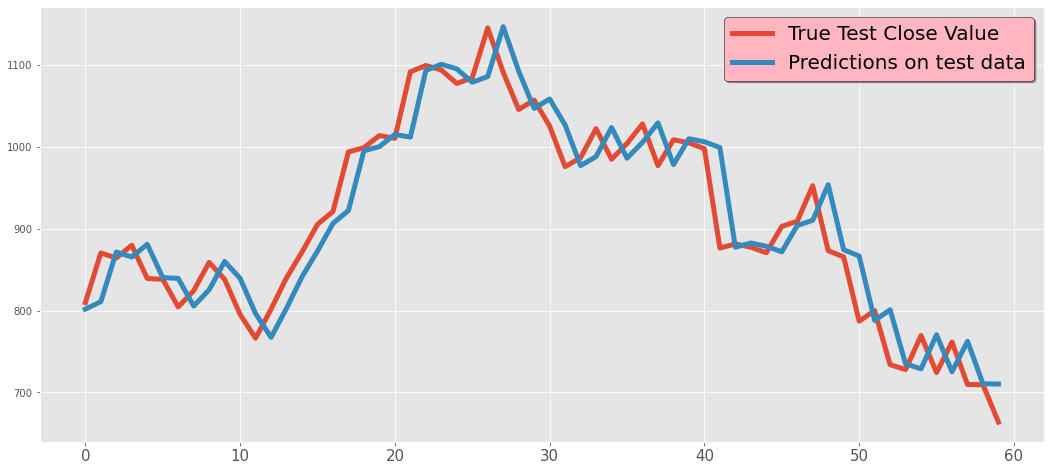

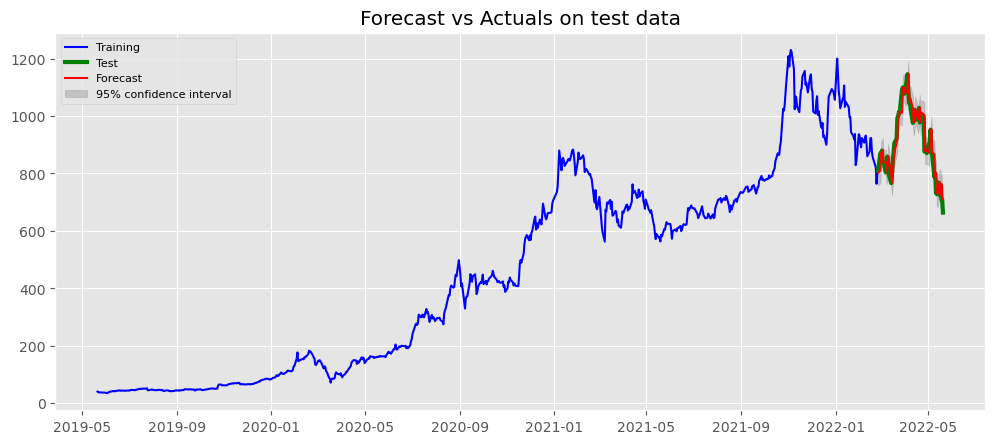

In [17]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

# Make as pandas series
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Forecasting for next 60 days

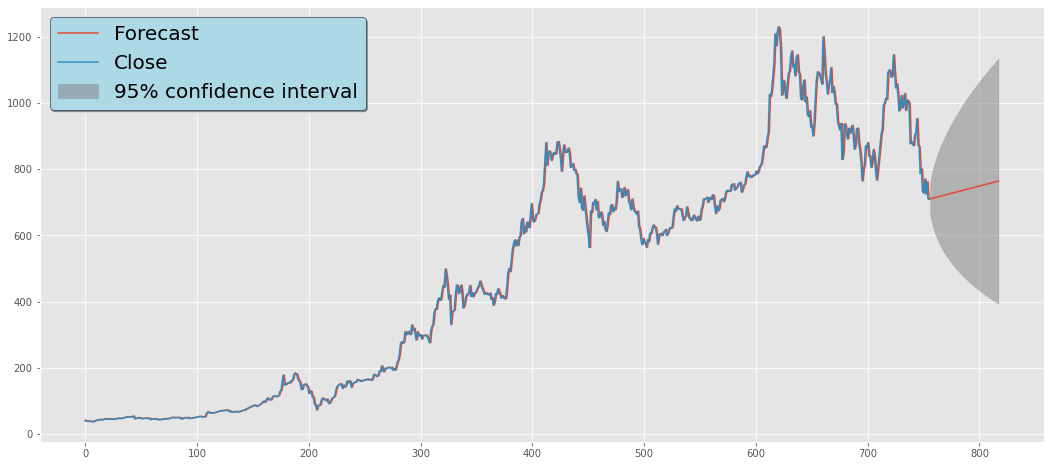

In [18]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
model_fit.plot_predict(start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()


Although our model is good but this model has trouble forecasting long-term data. This is possible because ARIMA is a sensitive algorithm and not a broad algorithm for predicting. Stock data, on the other hand, rarely show seasonality that can be detected using the ARIMA model.
Forecasting is thought to be easier if there is a visible or hidden pattern that repeats itself throughout time. 
Stock prices, on the other hand, are far too complicated to be modelled. There are so may external and dynamic factor affecting the price.


<hr style="border:1px solid black"> </hr>
**A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.
ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.**

#  Introduction to SARIMA Models

SARIMA (Seasonal ARIMA) is a modification of ARIMA that explicitly allows univariate time series data with a seasonal component. SARIMA accepts an additional set of parameters (P,D,Q)m that specify the model's seasonal components.

- P: Seasonal auto regressive order
- D: Seasonal difference order
- Q: Seasonal moving average order
- m: The number of time steps for a single seasonal period

This is written as (p,d,q)×(P,D,Q)m.

- From the ACF and PACF that we have plotted, we can determine the value of Seasonal (P,D,Q).
    In ACF and PACF, we have one spike at lag 3 that is out of confidence interval and also there is no significant correlation at lag 3 and lag 6. So, the order of P and Q is (1, 1).
    As we have used differencing of 1 to make data stationary so, D = 1. So, the best order for SARIMA is(0,1,0)x(1,1,1)3

In [19]:
train_data=tsla_close_diff_1[0:-60]
test_data=tsla_close_diff_1[-60:]

In [20]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 57.86925251287504


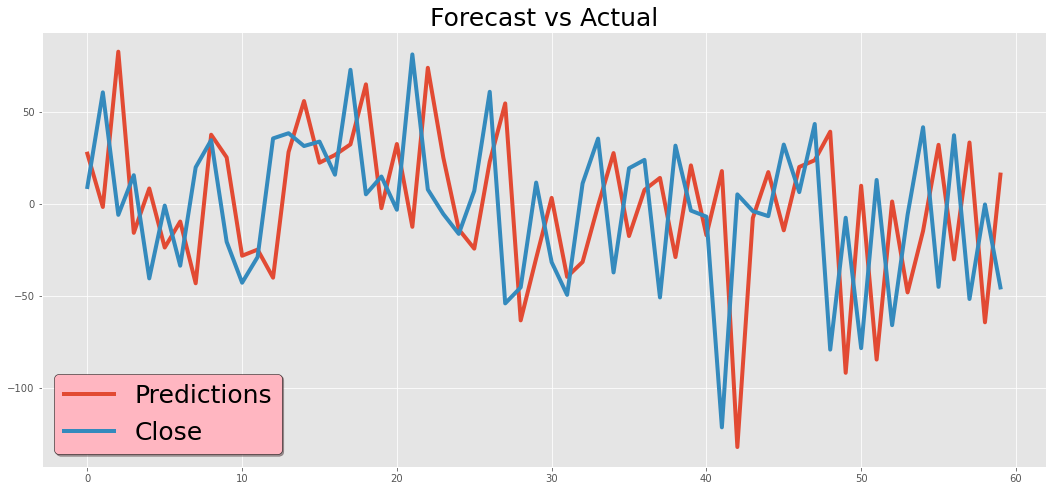

In [21]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

## Auto ARIMA

Automatically discover the optimal order for an ARIMA model.
After identifying the most optimal parameters for an ARIMA model, the auto arima function provides a fitted ARIMA model. This function is based on the commonly used forecast::auto. Arima R function.

The auro arima function fits models within the start p, max p, start q, max q ranges using differencing tests (e.g., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey–Fuller, or Phillips–Perron) to identify the order of differencing, d. If the seasonal option is enabled, D, auto arima additionally aims to identify the ideal P and Q hyper-parameters after doing the Canova-Hansen to determine the optimal order of seasonal differencing.

RMSE of Auto ARIMA Model : 39.61388467968555


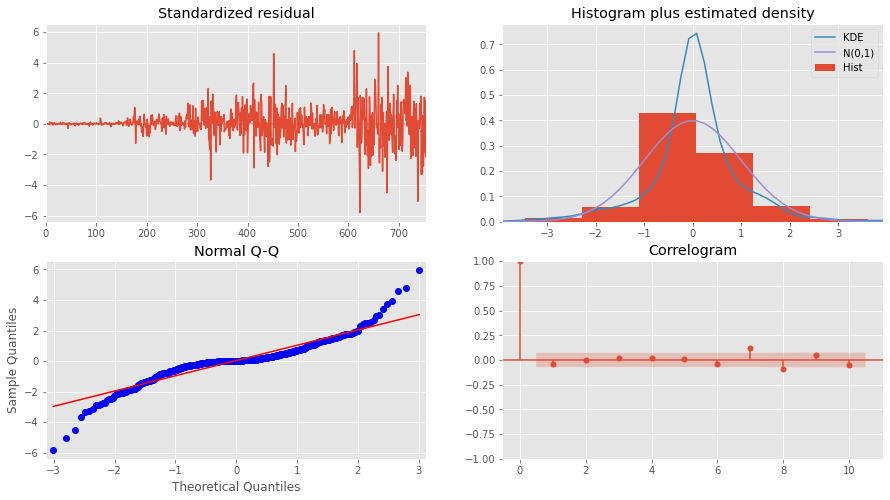

In [22]:
train_data=df_close[0:-60]
test_data=df_close[-60:]
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model_autoARIMA = auto_arima(history, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    fc, confint = model_autoARIMA.predict(n_periods=1, return_conf_int=True)
    predictions.append(fc)
    history.append(test_data[t])
    conf_list.append(confint)

print('RMSE of Auto ARIMA Model :', np.sqrt(mean_squared_error(test_data, predictions)))
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

**Top left**: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

**Top Right**: The density plot on the top right suggests a normal distribution with a mean of zero.

**Bottom left**: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

**Bottom Right**: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

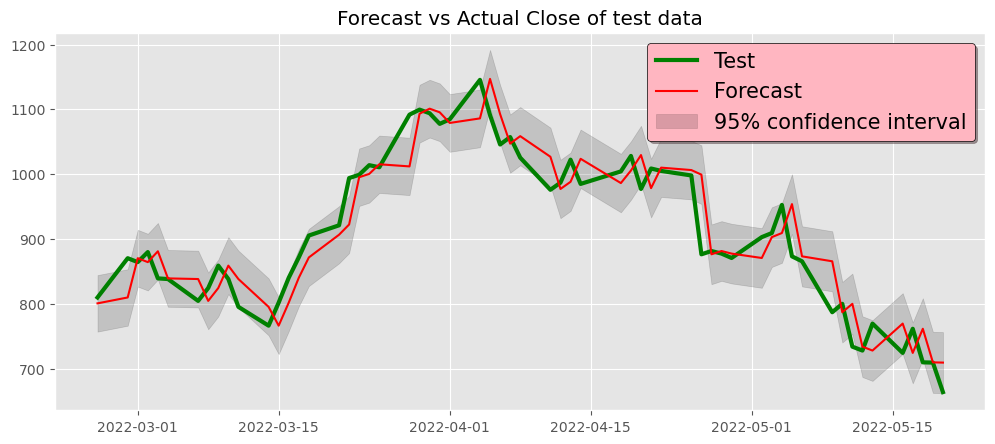

In [23]:
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actual Close of test data')
plt.legend(fontsize = 15, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

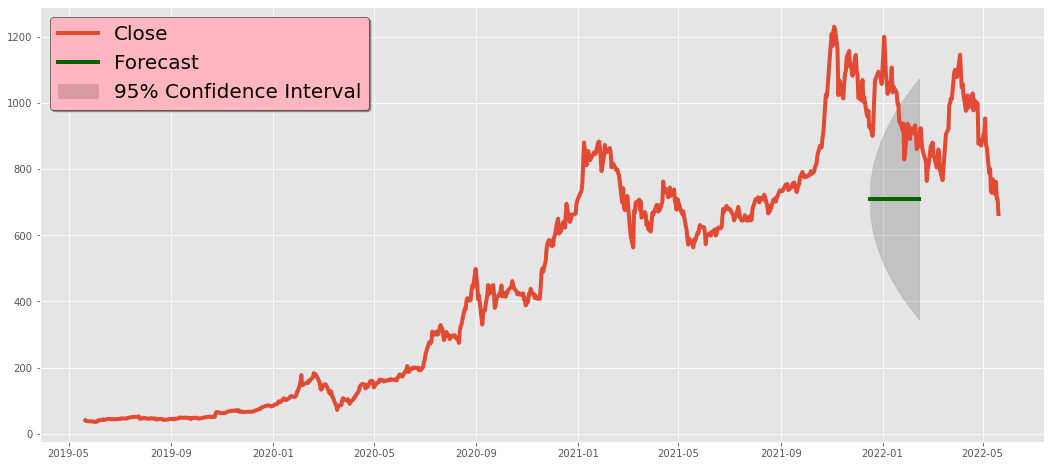

In [24]:
fc, confint = model_autoARIMA.predict(n_periods=60, return_conf_int=True)

# make series for plotting purpose
fc_series = pd.Series(fc, index=pd.date_range(start='17/12/2021', periods=60))
lower_series = pd.Series(confint[:, 0], index=pd.date_range(start='17/12/2021', periods=60))
upper_series = pd.Series(confint[:, 1], index=pd.date_range(start='17/12/2021', periods=60))

# Plot
plt.figure(figsize = (18,8))
plt.plot(df_close, linewidth = 4, label = 'Close')
plt.plot(fc_series, color='darkgreen', linewidth = 4, label = 'Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15, label = '95% Confidence Interval')
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()